Mean Squared Error_train: 0.009270982886482931
Root Mean Squared Error_train: 0.09628594334835656
Mean Absolute Error_train: 0.06175716991743662
R^2 Score_train: 0.996807635481626
Mean Squared Error_test: 0.04453525894378095
Root Mean Squared Error_test: 0.21103378626130212
Mean Absolute Error_test: 0.1381316335740879
R^2 Score_test: 0.9847854301450923


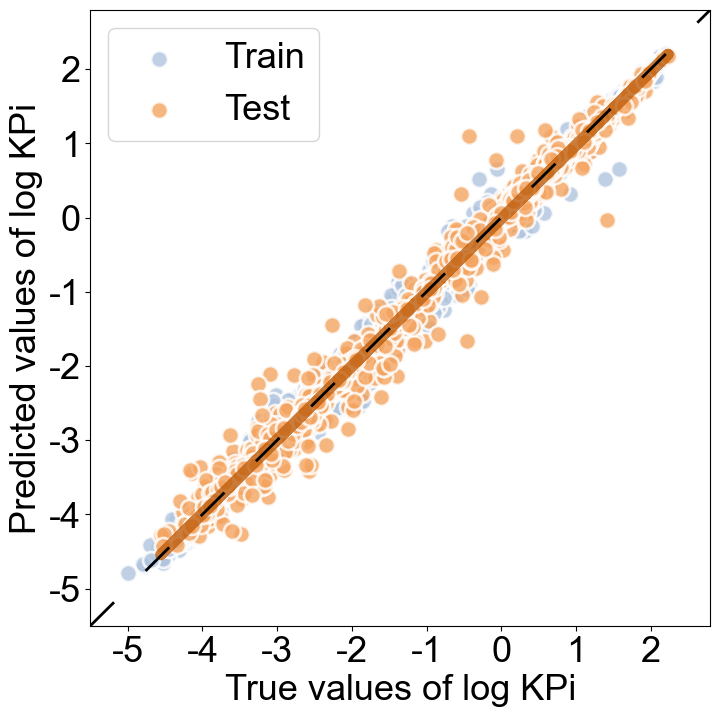

Slope_train: 0.9948134750484146
Intercept_train: -0.004974192212002682
Slope_test: 0.9927407663073821
Intercept_test: -0.017497174611687205


In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.legend as legend
from scipy.stats import linregress



df = pd.read_excel('preprocessed_input_data_3_features.xlsx')

 
y = df['log KPi']
X = df.drop(columns=['log KPi']) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XGBR = XGBRegressor(n_estimators=400, max_depth=5, learning_rate=0.34, min_child_weight=1, seed=0, subsample=1, colsample_bytree=1, gamma=0, reg_alpha=0, reg_lambda=1)        
XGBR.fit(X_train, y_train)
 

y_train_pred = XGBR.predict(X_train)
y_test_pred = XGBR.predict(X_test)
 

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred) 
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)   
print(f"Mean Squared Error_train: {mse_train}")
print(f"Root Mean Squared Error_train: {rmse_train}") 
print(f"Mean Absolute Error_train: {mae_train}")
print(f"R^2 Score_train: {r2_train}")

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred) 
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)   
print(f"Mean Squared Error_test: {mse_test}")
print(f"Root Mean Squared Error_test: {rmse_test}") 
print(f"Mean Absolute Error_test: {mae_test}")
print(f"R^2 Score_test: {r2_test}")


fig, ax = plt.subplots(figsize=(8, 8))  

ax.scatter(y_train, y_train_pred, label='Train', color='#B0C4DE', alpha=0.8, s=150, edgecolors='white', linewidths=2)  
  
  
ax.scatter(y_test, y_test_pred, label='Test', color='#F4A460', alpha=0.8, s=150, edgecolors='white', linewidths=2)  
  

ax.set_xlim(-5.5, 2.8)  
ax.set_ylim(-5.5, 2.8)
 
ax.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2])  
ax.set_xticklabels([-5, -4, -3, -2, -1, 0, 1, 2], fontsize=26, fontname='Arial')  
ax.set_yticks([-5, -4, -3, -2, -1, 0, 1, 2])  
ax.set_yticklabels([-5, -4, -3, -2, -1, 0, 1, 2], fontsize=26, fontname='Arial')


ax.set_xlabel('True values of log KPi', fontsize=26, fontname = 'Arial')  
ax.set_ylabel('Predicted values of log KPi', fontsize=26, fontname = 'Arial')  
  

legend_props = matplotlib.font_manager.FontProperties(family= 'Arial', size=26)
ax.legend(prop=legend_props)

slope_train, intercept_train, r_value_train, p_value_train, std_err_train = linregress(y_train, y_train_pred) 
slope_test, intercept_test, r_value_test, p_value_test, std_err_test = linregress(y_test, y_test_pred)

line_test_fit = plt.plot(y_test, slope_test * y_test + intercept_test, color='#BF5E0D', linestyle='solid', alpha=0.8, linewidth=8)


x_line = np.linspace(-5.5, 2.8, 100)
y_line = x_line

line, =plt.plot(x_line, y_line, color='#000000', linestyle='--', linewidth=2)
line.set_dashes([12, 16])

plt.show()

print (f"Slope_train: {slope_train}")
print (f"Intercept_train: {intercept_train}")
print (f"Slope_test: {slope_test}")
print (f"Intercept_test: {intercept_test}")

In [2]:
# Saving the XGB model with 3 input features as a ".pkl" file
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle


df = pd.read_excel('preprocessed_input_data_3_features.xlsx')


y = df['log KPi']
X = df.drop(columns=['log KPi']) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XGBR = XGBRegressor(n_estimators=400, max_depth=5, learning_rate=0.34, min_child_weight=1, seed=0, subsample=1, colsample_bytree=1, gamma=0, reg_alpha=0, reg_lambda=1)        
XGBR.fit(X_train, y_train)
 

XGBR_3features_pkl_path = f"XGB_3_input_features.pkl" 
with open(XGBR_3features_pkl_path, 'wb') as f:
    pickle.dump(XGBR, f)